# Assignment 7 Classification




## Data Scientists

Assume that we have a data-science club where data scientists meet and discuss data analysis and visualization. The members in the club are either paid accounts or unpaid accounts.  You are provided a list of tuples.  Each tuple contains three elements:
* tenure, which is the number of years as a data scientist, 
* salary, which is how much the data scientist ears, 
* account, which is a number that is either 1 for a paid account or 0 for an unpaid account. 



In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

%matplotlib inline 

plt.style.use('classic')
plt.style.use('seaborn-whitegrid')

#do not change the below statement
data = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]


In [2]:
class Member:

    def __init__(self):
        self.data = data # insert data from above to ensure if the data is altered the code will not break
        self.paid = [] # a list of tuples of paid member's salary and tenur
        self.unpaid = [] # a list of tuples of unpaid member's salary and tenur
        self.ptenur = [] # a list of paid member's tenur
        self.utenur = [] # a list of unpaid member's tenur
        self.psalary = [] # a list of paid member's salary
        self.usalary = [] # a list of unpaid member's salary
        
    def filter(self):
   
        for num in range(len(self.data)):
            if 1 in self.data[num]:
                '''Create a variable to convert the tuple into a list as the list is mutable with methods like pop'''
                convertp=list(self.data[num])
                convertp.pop() # remove the last element in a list, this case a 1
                self.paid.append(convertp) # adds the list to a list of lists in the last position
                self.ptenur.append(convertp[0]) # adds the first element to a list
                self.psalary.append(convertp[1]) # adds the second element to a list
                # the above has moved all the elements from the converted tuple into a call method
            else:
                '''Create a variable to convert the tuple into a list as a list is mutable to iterate the unpaid member 
                information'''
                altu=list(self.data[num]) #alter the type from tuple into list
                altu.pop() # remove the last element of the list
                self.unpaid.append(altu) # append a list of lists
                self.utenur.append(altu[0]) # append the first element from a list into the last element
                self.usalary.append(altu[1]) #appens the second element into a last element
                


### Problem 1: Plotting the Club Members

For this problem, you need to plot the data scientists in the data-science club so that we can conveniently visualize their tenured years, salaries, and paid accounts or not. Note that this problem was approached in an earlier assignment. I expect you to explore the data while approaching the question. 

In [3]:
# call the class
datasci = Member()
# call the filter method
datasci.filter()
# call the axis function to know ranges for all graphs
pten = datasci.ptenur
psal = datasci.psalary
uten = datasci.utenur
usal = datasci.usalary

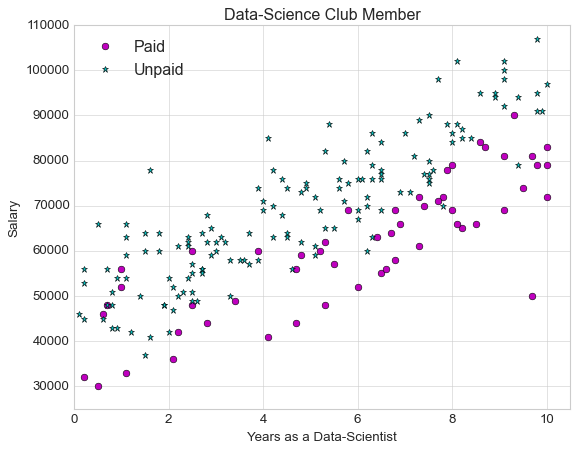

In [4]:
def scatter(xp,xu,yp,yu):
    plt.xlabel('Years as a Data-Scientist')
    plt.ylabel('Salary')
    plt.title('Data-Science Club Member')
    plt.grid(True)
    plt.plot(xp,yp, 'mo') #plots for paid
    plt.plot(xu,yu,'c*') # plots for unpaid
    plt.legend(['Paid', 'Unpaid'],loc='upper left')
    plt.xlim([0,10.5]) #extend the limit to visualize the data better
    plt.ylim([25000,110000])
    plt.show()
    
# call the scatter function
scatter(datasci.ptenur, datasci.utenur, datasci.psalary, datasci.usalary)

## Club Member Basis Salary and Tenur

From the information gathered on Salary and Tenur there is not a strong correlaiton from a Member's payment status. From the analysis done on the whole of the population there is no significant feature if a Member is going to skip payment. Since there are more Un-paid membership as seen in the graph below; 54 members have paid their dues. I would expect that this should be those members that have not understood the rules of the Club.

There are 54 members that have paid their dues.
There are 146 unpaid accounts.



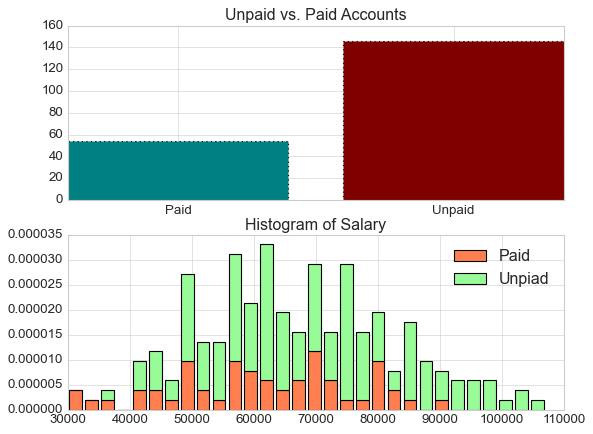

In [5]:
def twosub(ps, us):
    """
    There shall be a figure with two subplots based on the data scientist tuples. The two graphs are a bar and a histogram.
    The bar graph will display the total number of paid accounts from the membership. The second is a frequency of payment 
    histogram based on salary.
    Upon call: Function will create two sub plots
    parameters: two lists of the paid and unpaid member's salary
    """
    fig, (ax1,ax2) = plt.subplots(2)
    # notify the program there will be two subplots
    paid = len(ps) # get an integer for paid and unpaid members total
    unpaid = len(us)
    print('There are '+ str(paid), 'members that have paid their dues.\n'+ 'There are '+str(unpaid),'unpaid accounts.\n')
    # display the total to ensure the graphs are correct
    ax1.bar(['Paid','Unpaid'],[paid,unpaid], color=['teal','maroon'], ls= ':')
    # construct the first graph with subplot and set title
    ax1.set_title('Unpaid vs. Paid Accounts')
    n, bins, patchs= ax2.hist([ps,us],30,stacked=True, density=True, color=['coral','palegreen'])
    # construct second graph with subplot method and label
    plt.legend(['Paid','Unpiad'],loc='upper right')
    plt.title('Histogram of Salary')
    plt.show()
# call function to display two subplots
twosub(datasci.psalary,datasci.usalary)

The histogram of the information can show that the club's dues are not the priority across the board from salary. The highest being in the 70,000 range therefore a intense poll of that range can show more significant determination as to why the populaiton as a whole has decided to fore-go their dues.

When having this type of data and exploring the different options on presenting the plots, we can determine what the best output for the user to engage with. I feel like this type of data is well rounded for many various graph typing.

### Problem 2  Preparing for Building Learning Algorithms 

For this problem, you need to write functions/class definition(s) to prepare building classifiers and testing them using various metrics including accuracy, sensitivity, specificity, positive predicative value, negative predictive value.  In addition, you need to define a class **DataScientist** from which you can create data examples.  Each example represents a data scientist in terms of its features including salary and tenured years.  Your class definition also needs to allow you label a data scientist to appropriately distinguish paid from unpaid accounts in the club. 

After you complete your class DataScientist definition, you need to process the provided data into a list of data examples. (Each example is a data scientist.)  



In [6]:
def minkowskiDist(v1, v2, p):
    """Assumes v1 and v2 are equal-length arrays of numbers
       Returns Minkowski distance of order p between v1 and v2"""
    dist = 0.0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1/p)

In [7]:
class DataSci(object):

    def __init__(self, tenur, salary, label):
        self.label = label
        self.tenur = tenur
        self.salary = salary
        self.feat = [tenur,salary]
        
    def getLabel(self):
        return self.label
    
    def getTen(self):
        return self.tenur
    
    def getSal(self):
        return self.salary
    
    def getFeatures(self):
        return self.feat
    
    def distance(self, other):
        return minkowskiDist(self.getFeatures(),
                             other.getFeatures(), 2)
    
def filterSci():
    bank = []
    for i in data:
        delta = list(i)
        if 1 in i:
            bank.append(DataSci(delta[0], delta[1], "Paid"))
        else:
            bank.append(DataSci(delta[0], delta[1], "Unpaid"))
    return bank

example = filterSci()

print(example[1])
print(example[1].label)
print(example[1].tenur)
print(example[1].salary)
print(example[1].feat)
print(example[1].getFeatures())


Unpaid
1.9
48000
[1.9, 48000]
[1.9, 48000]


In [8]:
def accuracy(truePos, falsePos, trueNeg, falseNeg):
    numerator = truePos + trueNeg
    denominator = truePos + trueNeg + falsePos + falseNeg
    return numerator/denominator

def sensitivity(truePos, falseNeg):
    try:
        return truePos/(truePos + falseNeg)
    except ZeroDivisionError:
        return float('nan')
    
    
def specificity(trueNeg, falsePos):
    try:
        return trueNeg/(trueNeg + falsePos)
    except ZeroDivisionError:
        return float('nan')
    
def posPredVal(truePos, falsePos):
    try:
        return truePos/(truePos + falsePos)
    except ZeroDivisionError:
        return float('nan')
    
def negPredVal(trueNeg, falseNeg):
    try:
        return trueNeg/(trueNeg + falseNeg)
    except ZeroDivisionError:
        return float('nan')

In [9]:
def getStats(truePos, falsePos, trueNeg, falseNeg, toPrint = True):
    accur = accuracy(truePos, falsePos, trueNeg, falseNeg)
    sens = sensitivity(truePos, falseNeg)
    spec = specificity(trueNeg, falsePos)
    ppv = posPredVal(truePos, falsePos)
    if toPrint:
        print(' Accuracy =', round(accur, 3))
        print(' Sensitivity =', round(sens, 3))
        print(' Specificity =', round(spec, 3))
        print(' Pos. Pred. Val. =', round(ppv, 3))
    return (accur, sens, spec, ppv)

In [10]:
def leaveOneOut(examples, method, toPrint = True):
    truePos, falsePos, trueNeg, falseNeg = 0, 0, 0, 0
    for i in range(len(examples)):
        testCase = examples[i]
        trainingData = examples[0:i] + examples[i+1:]
        results = method(trainingData, [testCase])
        truePos += results[0]
        falsePos += results[1]
        trueNeg += results[2]
        falseNeg += results[3]
    if toPrint:
        getStats(truePos, falsePos, trueNeg, falseNeg)
    return truePos, falsePos, trueNeg, falseNeg

def split80_20(examples):
    sampleIndices = random.sample(range(len(examples)),
                                  len(examples)//5)
    trainingSet, testSet = [], []
    for i in range(len(examples)):
        if i in sampleIndices:
            testSet.append(examples[i])
        else:
            trainingSet.append(examples[i])
    return trainingSet, testSet

def randomSplits(examples, method, numSplits, toPrint = True):
    truePos, falsePos, trueNeg, falseNeg = 0, 0, 0, 0
    random.seed(0)
    for t in range(numSplits):
        trainingSet, testSet = split80_20(examples)
        results = method(trainingSet, testSet)
        truePos += results[0]
        falsePos += results[1]
        trueNeg += results[2]
        falseNeg += results[3]
    getStats(truePos/numSplits, falsePos/numSplits,
             trueNeg/numSplits, falseNeg/numSplits, toPrint)
    return truePos/numSplits, falsePos/numSplits,\
             trueNeg/numSplits, falseNeg/numSplits



### Problem 3 Logistic Regression 

In this problem, you need to write function(s) to build a classifier using logistic regression algorithm.  Then, you need to apply the test methods (leaveOneOut and randomSplit) to evaluate the learned classifier in terms of accuracy, sensitivity, specificity, and positive predicative value.

The output of your evaluation on the logistic-regression classifier you built could be similar to the below, assuming the salary and tenured year values are scaled to values that have mean 0 and std 1 and the probability threshold is set as 0.3. 

To scale the values, you can apply the function scaleAttrs.  You can also apply code that defines the test methods and measures.  The function definitions are provided above in the Reference Code section. I recommend you to review the lecture if you need to figure what and how they can applied in a classification system. 

More Hint: In addition to the code provided in this document, you will need to reference the code in lecture that is used to build a model using logistic regression, apply the model, and evaluate the model. 

In [11]:
def buildModel(examples, toPrint = True):
    featureVecs, labels = [],[]
    for e in examples:
        featureVecs.append(e.getFeatures())
        labels.append(e.getLabel())
    LogisticRegression = sklearn.linear_model.LogisticRegression
    model = LogisticRegression().fit(featureVecs, labels)
    #print(model.coef_)
    
    if toPrint:
        print('model.classes_ =', model.classes_)
        for i in range(len(model.coef_)):
            print('For label', model.classes_[1])
            for j in range(len(model.coef_[0])):
                print('   ', Customer.featureNames[j], '=',
                      model.coef_[0][j])
    return model

def applyModel(model, testSet, label, prob = 0.3):
    testFeatureVecs = [e.getFeatures() for e in testSet]
    probs = model.predict_proba(testFeatureVecs)
    truePos, falsePos, trueNeg, falseNeg = 0, 0, 0, 0
    #This code is a bit different from the slide in VoiceThread
    ci = list(model.classes_).index(label)
    for i in range(len(probs)):
        if probs[i][ci] > prob:
            if testSet[i].getLabel() == label:
                truePos += 1
            else:
                falsePos += 1
        else:
            if testSet[i].getLabel() != label:
                trueNeg += 1
            else:
                falseNeg += 1
    return truePos, falsePos, trueNeg, falseNeg

def lr(trainingData, testData, prob = 0.3):
    model = buildModel(trainingData, False)
    results = applyModel(model, testData, 'Paid', prob)
    return results

random.seed(0)
numSplits = 10
print('Average of', numSplits, '80/20 splits LR')
truePos, falsePos, trueNeg, falseNeg =\
      randomSplits(example, lr, numSplits)

print('Average of LOO testing using LR')
truePos, falsePos, trueNeg, falseNeg =\
      leaveOneOut(example, lr)

Average of 10 80/20 splits LR
 Accuracy = 0.718
 Sensitivity = 0.402
 Specificity = 0.833
 Pos. Pred. Val. = 0.467
Average of LOO testing using LR
 Accuracy = 0.745
 Sensitivity = 0.463
 Specificity = 0.849
 Pos. Pred. Val. = 0.532


By extracting the data from the the Paid members we can further understand the subject in question. Ensuring that the raw data has the statistics explored we can produce the various weights each and prove if there is an imbalance. 

In [12]:
def lr(trainingData, testData, prob = 0.3):
    model = buildModel(trainingData, False)
    results = applyModel(model, testData, 'Unpaid', prob)
    return results

random.seed(0)
numSplits = 10
print('Average of', numSplits, '80/20 splits LR')
truePos, falsePos, trueNeg, falseNeg =\
      randomSplits(example, lr, numSplits)

print('Average of LOO testing using LR')
truePos, falsePos, trueNeg, falseNeg =\
      leaveOneOut(example, lr)

Average of 10 80/20 splits LR
 Accuracy = 0.748
 Sensitivity = 1.0
 Specificity = 0.056
 Pos. Pred. Val. = 0.744
Average of LOO testing using LR
 Accuracy = 0.755
 Sensitivity = 1.0
 Specificity = 0.093
 Pos. Pred. Val. = 0.749


In determmining the Un-paid sensitvity and specificity we can use the statistics to predict what the vectors can be. Are there a significant features that can prove the level of intent the features can connect.

### Problem 4 KNN

In this problem, you need to write function(s) to build a classifier using KNN algorithm.  Then, you need to apply the test methods (leaveOneOut and randomSplit) to evaluate the learned classifer in terms of accuracy, sensitivity, specificity, and positive predicative value.


In [13]:
def findKNearest(example, exampleSet, k):
    kNearest, distances = [], []
    #Build lists containing first k examples and their distances
    for i in range(k):
        kNearest.append(exampleSet[i])
        distances.append(example.distance(exampleSet[i]))
    maxDist = max(distances) #Get maximum distance
    #Look at examples not yet considered
    for e in exampleSet[k:]:
        dist = example.distance(e)
        if dist < maxDist:
            #replace farther neighbor by this one
            maxIndex = distances.index(maxDist)
            kNearest[maxIndex] = e
            distances[maxIndex] = dist
            maxDist = max(distances)      
    return kNearest, distances

def KNearestClassify(training, testSet, label, k):
    """Assumes training & testSet lists of examples, k an int
       Predicts whether each example in testSet has label
       Returns number of true positives, false positives,
          true negatives, and false negatives"""
    truePos, falsePos, trueNeg, falseNeg = 0, 0, 0, 0
    for testCase in testSet:
        nearest, distances = findKNearest(testCase, training, k)
        #conduct vote
        numMatch = 0
        for i in range(len(nearest)):
            if nearest[i].getLabel() == label:
                numMatch += 1
        if numMatch > k//2: #guess label
            if testCase.getLabel() == label:
                truePos += 1
            else:
                falsePos += 1
        else: #guess not label
            if testCase.getLabel() != label:
                trueNeg += 1
            else:
                falseNeg += 1
    return truePos, falsePos, trueNeg, falseNeg

In [14]:
knn = lambda training, testSet:\
             KNearestClassify(training, testSet,
                              'Paid', 5)
numSplits = 10
print('Average of', numSplits,
      '80/20 splits using KNN (k=5)')
truePos, falsePos, trueNeg, falseNeg =\
      randomSplits(example, knn, numSplits)

print('Average of LOO testing using KNN (k=5)')
truePos, falsePos, trueNeg, falseNeg =\
      leaveOneOut(example, knn)
    

Average of 10 80/20 splits using KNN (k=5)
 Accuracy = 0.685
 Sensitivity = 0.196
 Specificity = 0.863
 Pos. Pred. Val. = 0.344
Average of LOO testing using KNN (k=5)
 Accuracy = 0.69
 Sensitivity = 0.241
 Specificity = 0.856
 Pos. Pred. Val. = 0.382


By using the KNN which is easy to use and allow the learned model to train themselves. They use the the neighbor law to see how many are close together.

In [15]:
knn = lambda training, testSet:\
             KNearestClassify(training, testSet,
                              'Unpaid', 5)
numSplits = 10
print('Average of', numSplits,
      '80/20 splits using KNN (k=5)')
truePos, falsePos, trueNeg, falseNeg =\
      randomSplits(example, knn, numSplits)

print('Average of LOO testing using KNN (k=5)')
truePos, falsePos, trueNeg, falseNeg =\
      leaveOneOut(example, knn)

Average of 10 80/20 splits using KNN (k=5)
 Accuracy = 0.685
 Sensitivity = 0.863
 Specificity = 0.196
 Pos. Pred. Val. = 0.746
Average of LOO testing using KNN (k=5)
 Accuracy = 0.69
 Sensitivity = 0.856
 Specificity = 0.241
 Pos. Pred. Val. = 0.753


## Loan

In the following problems, you will analyze a set of loan data points.  Each data point is presented as a row in the data file (loan_data.csv).   Each row contains the customer data including id, outcome, dti, borrower_score, and payment_inc_ratio. The loan outcome should be used to label the data point for your classifier.  You should not use id as a feature for your feature vectors. 



### Problem 5  Preparing for Building Learning Algorithms 

For this problem, you need to write functions/class definition(s) to prepare building classifiers and testing them using various metrics including accuracy, sensitivity, specificity, positive predicative value, negative predictive value. In Problem 2, you are also required to define the metric functions. So, you can reuse the functions you defined there. In addition, you need to define a class Customer from which you can create data examples.  Each example represents a Customer in terms of its features.  Your class definition also needs to allow you label a customer appropriately based on the loan outcome "paid off" or "default". 

After you complete your class Customer definition, you need to process the provided data into a list of data examples. (Each example is a customer.)  

Again, I would emphasize that you can reuse as much code as possible from the lecture notes and share your code to solve the problems in this assignment.  

In [16]:
class Customer(object):
    featureNames = ('ID', 'Outcome', 'DTI', 'Borrow', 'Payment')
    def __init__(self, idenf, outcome, dti, borw, pay):
        self.id = idenf
        self.label = outcome
        self.dti = dti
        self.borw = borw
        self.pay = pay
        self.feat = [dti,borw,pay]
        
    def getLabel(self):
        return self.label
    
    def getDTI(self):
        return self.dti
    
    def getBorrow(self):
        return self.borw
    
    def getFeatures(self):
        return self.feat
    
    def distance(self, other):
        return minkowskiDist(self.getFeatures(),
                             other.getFeatures(), 2)


In [17]:
def load():
    file = open('loan_data.csv', 'r')
    bank = []
    delta = []
    for line in file:
        bank = line.split(',')
        if 'paid' in line:
            delta.append(Customer(bank[0], "Paid", 
                              float(bank[2]), float(bank[3]), float(bank[4].replace("\n",""))))
        else:
            delta.append(Customer(bank[0], "Default", 
                              float(bank[2]), float(bank[3]), float(bank[4].replace("\n",""))))
    file.close()
    return delta

examples = load()
print(examples[3].getFeatures())

[21.11, 0.4, 2.33482]


In [18]:
def ler(trainingData, testData, prob = 0.3):
    model = buildModel(trainingData, False)
    results = applyModel(model, testData, 'Paid', prob)
    return results

random.seed(0)
numSplits = 10
print('Average of', numSplits, '80/20 splits LR')
truePos, falsePos, trueNeg, falseNeg =\
      randomSplits(examples, ler, numSplits)

print('Average of LOO testing using LR')
truePos, falsePos, trueNeg, falseNeg =\
      leaveOneOut(examples, ler)

Average of 10 80/20 splits LR
 Accuracy = 0.567
 Sensitivity = 0.959
 Specificity = 0.139
 Pos. Pred. Val. = 0.549
Average of LOO testing using LR
 Accuracy = 0.567
 Sensitivity = 0.96
 Specificity = 0.143
 Pos. Pred. Val. = 0.547


In [19]:
def ler(trainingData, testData, prob = 0.3):
    model = buildModel(trainingData, False)
    results = applyModel(model, testData, 'Default', prob)
    return results

random.seed(0)
numSplits = 10
print('Average of', numSplits, '80/20 splits LR')
truePos, falsePos, trueNeg, falseNeg =\
      randomSplits(examples, ler, numSplits)

print('Average of LOO testing using LR')
truePos, falsePos, trueNeg, falseNeg =\
      leaveOneOut(examples, ler)

Average of 10 80/20 splits LR
 Accuracy = 0.567
 Sensitivity = 0.956
 Specificity = 0.211
 Pos. Pred. Val. = 0.525
Average of LOO testing using LR
 Accuracy = 0.568
 Sensitivity = 0.945
 Specificity = 0.219
 Pos. Pred. Val. = 0.529


### Problem 6 Logistic Regression 

In this problem, you need to write function(s) to build a classifier using logistic regression algorithm.  Then, you need to apply the test methods (leaveOneOut and randomSplit) to evaluate the learned classifier in terms of accuracy, sensitivity, specificity, and positive predicative value.

 Additionally, you need to plot the ROC curve and compute the AUC score to evaluate your classifier.  

model.classes_ = ['Default' 'Paid']
For label Paid
    ID = -0.015414099736805095
    Outcome = 4.220921433045578
    DTI = -0.05825894962100554


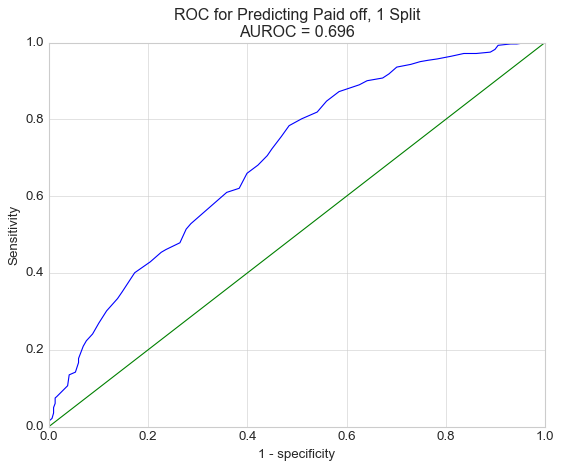

0.6960390739997324

In [20]:
# ROC(Receiver Operating Characteristic)
def buildROC(trainingSet, testSet, title, plot = True):
    model = buildModel(trainingSet, True)
    xVals, yVals = [], []
    p = 0.0
    while p <= 1.0:
        truePos, falsePos, trueNeg, falseNeg =\
                               applyModel(model, testSet,
                               'Default', p)
        xVals.append(1.0 - specificity(trueNeg, falsePos))
        yVals.append(sensitivity(truePos, falseNeg))
        p += 0.01
    #auroc = sklearn.metrics.auc(xVals, yVals, True)
    auroc = sklearn.metrics.auc(xVals, yVals)
    if plot:
        plt.plot(xVals, yVals)
        plt.plot([0,1], [0,1])
        title = title + '\nAUROC = ' + str(round(auroc,3))
        plt.title(title)
        plt.xlabel('1 - specificity')
        plt.ylabel('Sensitivity')
        plt.show()
    return auroc

random.seed(0)
trainingSet, testSet = split80_20(examples)
buildROC(trainingSet, testSet, 'ROC for Predicting Paid off, 1 Split')

model.classes_ = ['Default' 'Paid']
For label Paid
    ID = -0.015414099736805095
    Outcome = 4.220921433045578
    DTI = -0.05825894962100554


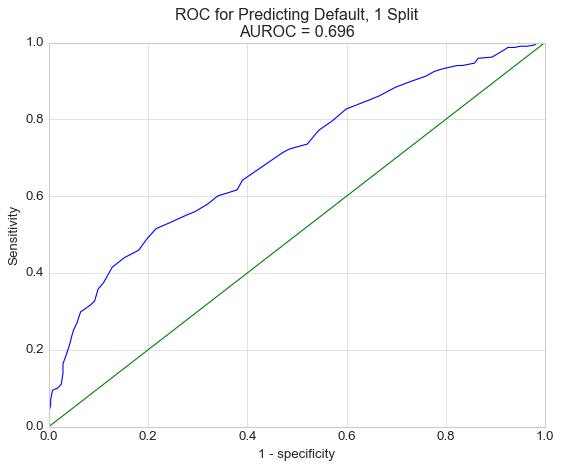

0.6960390739997324

In [21]:
# ROC(Receiver Operating Characteristic)
def buildROC(trainingSet, testSet, title, plot = True):
    model = buildModel(trainingSet, True)
    xVals, yVals = [], []
    p = 0.0
    while p <= 1.0:
        truePos, falsePos, trueNeg, falseNeg =\
                               applyModel(model, testSet,
                               'Paid', p)
        xVals.append(1.0 - specificity(trueNeg, falsePos))
        yVals.append(sensitivity(truePos, falseNeg))
        p += 0.01
    #auroc = sklearn.metrics.auc(xVals, yVals, True)
    auroc = sklearn.metrics.auc(xVals, yVals)
    if plot:
        plt.plot(xVals, yVals)
        plt.plot([0,1], [0,1])
        title = title + '\nAUROC = ' + str(round(auroc,3))
        plt.title(title)
        plt.xlabel('1 - specificity')
        plt.ylabel('Sensitivity')
        plt.show()
    return auroc

random.seed(0)
trainingSet, testSet = split80_20(examples)
buildROC(trainingSet, testSet, 'ROC for Predicting Default, 1 Split')

## Problem 7 Summary Writeup

For this problem, you are expected to reflect on the classifiers you built on the two data sets (data scientists and loan customers).  You need to address the below questions:

While building the classifiers using KNN and logistic regression, how do you think the classifiers? Any one is better? And why?

I feel like the data sets are very apt to having the KNN and logistic regression built. During the sampling we used cross validation to create a predictive model. I feel like doing the KNN or LR is a better model for these data sets. The outcome creates a parameter of the feature weights. This shows the relationship between the feature and the outcome. I think the KNN shows the positive correlation with feature and the outcome. Therefore the KNN is better. 

I understand the inssue of it being memory intestive, it really took some time to generate the code once I was ready to observe the results. I really think the ease of use is what makes it better than logistic regression. The coding was fast and efficent.